## Constant proportion portfolio insurance and drawdown constraints

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import AKCRiskKit as akr

In [2]:
ind_return = akr.get_ind_returns()
tmi_return = akr.get_total_market_index_returns()

In [3]:
risky_r = ind_return[["Fin","Steel","Beer"]]["2000":]
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r[:]=0.03/12
start = 1000
floor = 0.8

1. Cushion (risk budget): Asset value - floor value
2. Compute an allocation to safe vs risky asset ---> m * risk budget
3. Recompute asset value based on returns

In [4]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

In [5]:
for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w,1)
    risky_w = np.maximum(risky_w,0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    ## update account value for this time step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the values to plot later
    account_history.iloc[step] = account_value
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w


In [6]:
account_history.head()

,Fin,Steel,Beer
2000-01,974.480000,984.380000,987.320000
2000-02,931.167544,1023.292876,922.971256
2000-03,998.187296,1047.555176,924.835988
2000-04,973.927479,1042.079009,939.993701
2000-05,1001.460033,1007.137753,991.145489


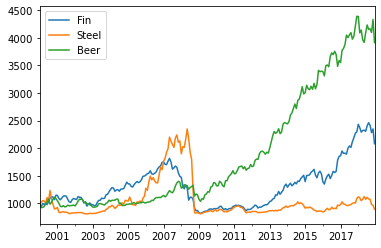

In [7]:
account_history.plot()

In [8]:
risky_wealth = start*(1 + risky_r).cumprod()

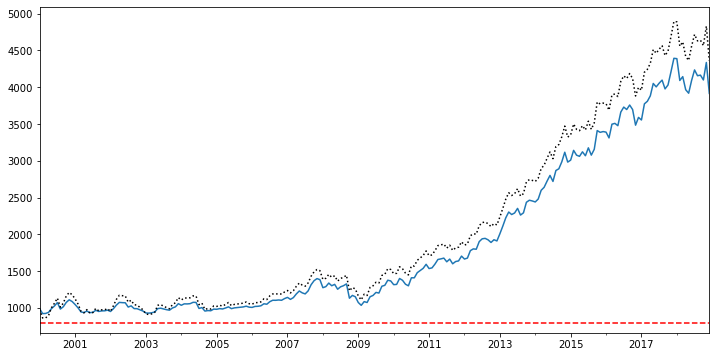

In [9]:
ax = account_history["Beer"].plot(figsize=(12,6))
risky_wealth["Beer"].plot(ax=ax,style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

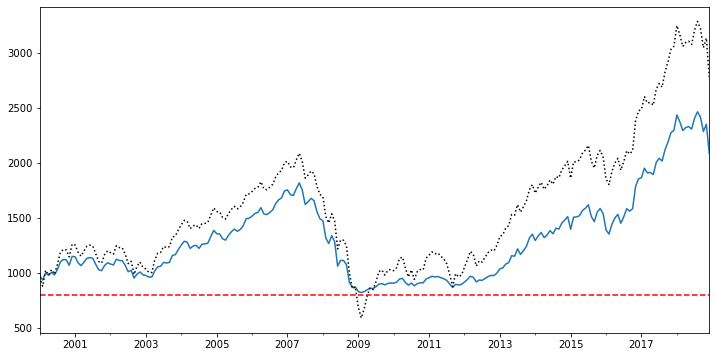

In [10]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax,style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

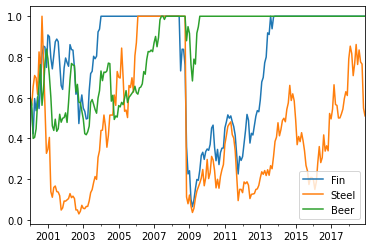

In [11]:
risky_w_history.plot()

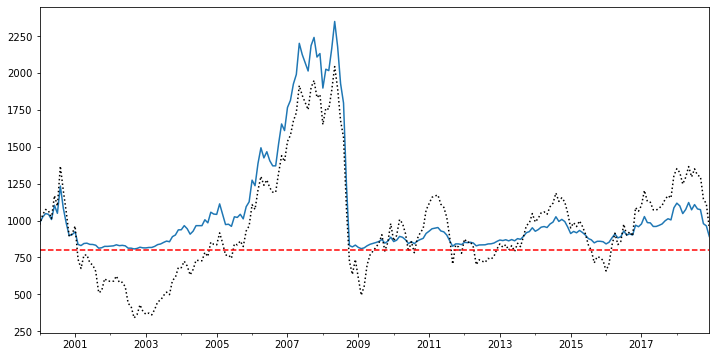

In [12]:
ind = "Steel"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax,style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

In [13]:

akr.summary_stats(risky_r)

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.090815,0.277491,-0.718465
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.140580,-0.013917,-0.758017
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.061100,0.568133,-0.271368


In [14]:
btr = akr.run_cppi(risky_r)

In [15]:
akr.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.053808,0.298251,-0.549673
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.068080,-0.038602,-0.655198
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.049275,0.639808,-0.259582


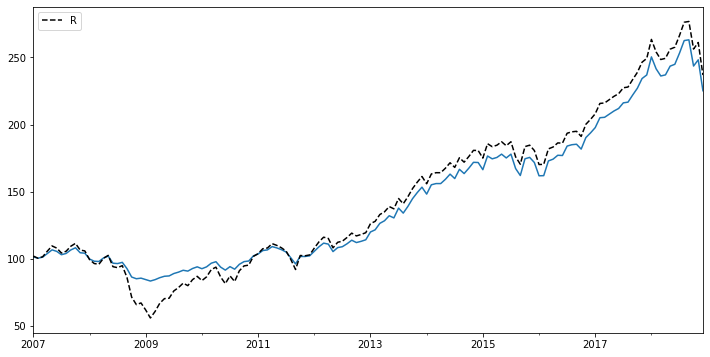

In [16]:
btr = akr.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(figsize=(12,6), legend=False)
btr["Risky Wealth"].plot(ax=ax, style="k--",legend="False")

In [17]:
akr.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.077674,0.470311,-0.499943


In [18]:
akr.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.047786,0.665259,-0.229683


In [19]:
btr = akr.run_cppi(ind_return["2007":][["Steel","Fin","Beer"]],drawdown=0.25)

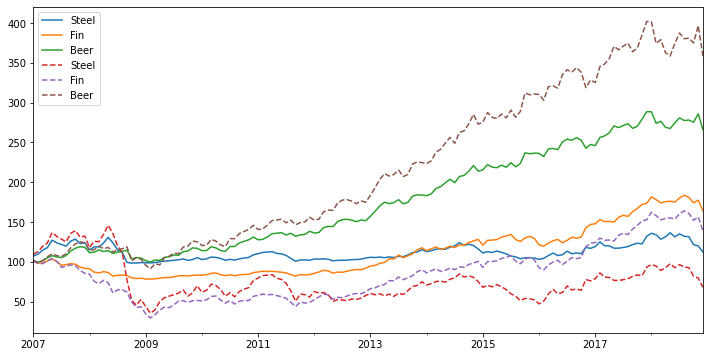

In [20]:
ax = btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [21]:
akr.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.13198,-0.137261,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.10610,0.116957,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.04687,0.850365,-0.271368


In [22]:
akr.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.043444,0.013355,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.038201,0.463386,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.031027,0.947164,-0.161186
